In [187]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
import pandas as pd
import numpy as np
from numpy import log
import matplotlib.pyplot as plt      
import plotly.express as px
import seaborn as sns                            
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

In [243]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [189]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Time-Series/main/Arima/Data/PBI.csv'

In [190]:
df=pd.read_csv(url,sep=';')

In [191]:
df=pd.DataFrame(df)

In [192]:
df.head(10)

,Date,PBI
0,Ene03,73.222370
1,Feb03,71.079432
2,Mar03,74.342723
3,Abr03,80.667711
4,May03,83.222646
5,Jun03,80.853774
6,Jul03,79.207017
7,Ago03,74.212014
8,Sep03,73.867835
9,Oct03,77.598914


In [193]:
df.tail(10)

,Date,PBI
231,Abr22,171.183193
232,May22,179.981667
233,Jun22,178.073198
234,Jul22,177.435247
235,Ago22,178.755347
236,Sep22,181.984000
237,Oct22,182.625419
238,Nov22,179.642822
239,Dic22,196.490692
240,Ene23,164.046519


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    241 non-null    object 
 1   PBI     241 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [195]:
from datetime import datetime

In [196]:
# Función para convertir el formato de la fecha
def parse_date(date_str):
    month = date_str[:3]
    year = '20' + date_str[-2:]
    date = month + '-' + year
    return date

# Aplicar la función a la columna "Date"
df['Date'] = df['Date'].apply(parse_date)

In [197]:
df.head()

,Date,PBI
0,Ene-2003,73.222370
1,Feb-2003,71.079432
2,Mar-2003,74.342723
3,Abr-2003,80.667711
4,May-2003,83.222646


In [198]:
df.tail(10)

,Date,PBI
231,Abr-2022,171.183193
232,May-2022,179.981667
233,Jun-2022,178.073198
234,Jul-2022,177.435247
235,Ago-2022,178.755347
236,Sep-2022,181.984000
237,Oct-2022,182.625419
238,Nov-2022,179.642822
239,Dic-2022,196.490692
240,Ene-2023,164.046519


In [199]:
df.sample(10)

,Date,PBI
80,Sep-2009,111.002194
127,Ago-2013,143.650212
69,Oct-2008,111.652316
211,Ago-2020,156.656437
169,Feb-2017,147.486007
215,Dic-2020,191.371805
202,Nov-2019,174.206812
100,May-2011,129.635869
139,Ago-2014,145.595315
103,Ago-2011,127.173297


In [200]:
# Mapeo personalizado para los nombres de los meses en español
month_map = {
    'Ene': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Sep': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dic': 'Dec'
}

# Aplicar la conversión de fecha con el mapeo personalizado
df['Date'] = pd.to_datetime(df['Date'].replace(month_map, regex=True), format='%b-%Y')


In [201]:
df.sample(10)

,Date,PBI
116,2012-09-01,136.812369
154,2015-11-01,153.424115
89,2010-06-01,122.939504
101,2011-06-01,126.608697
42,2006-07-01,92.961600
203,2019-12-01,189.600038
29,2005-06-01,88.455773
64,2008-05-01,112.075730
104,2011-09-01,128.166470
144,2015-01-01,138.197687


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    241 non-null    datetime64[ns]
 1   PBI     241 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [203]:
df.set_index('Date',inplace=True)

In [204]:
df.head()

,PBI
Date,
2003-01-01,73.222370
2003-02-01,71.079432
2003-03-01,74.342723
2003-04-01,80.667711
2003-05-01,83.222646


In [205]:
df.shape

(241, 1)

In [206]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [207]:
Prueba_Dickey_Fuller(df['PBI'],'PBI')

Resultados de la prueba de Dickey-Fuller para columna: PBI
Test Statistic                         -1.167740
p-value                                 0.687317
No Lags Used                           14.000000
Número de observaciones utilizadas    226.000000
Critical Value (1%)                    -3.459620
Critical Value (5%)                    -2.874415
Critical Value (10%)                   -2.573632
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


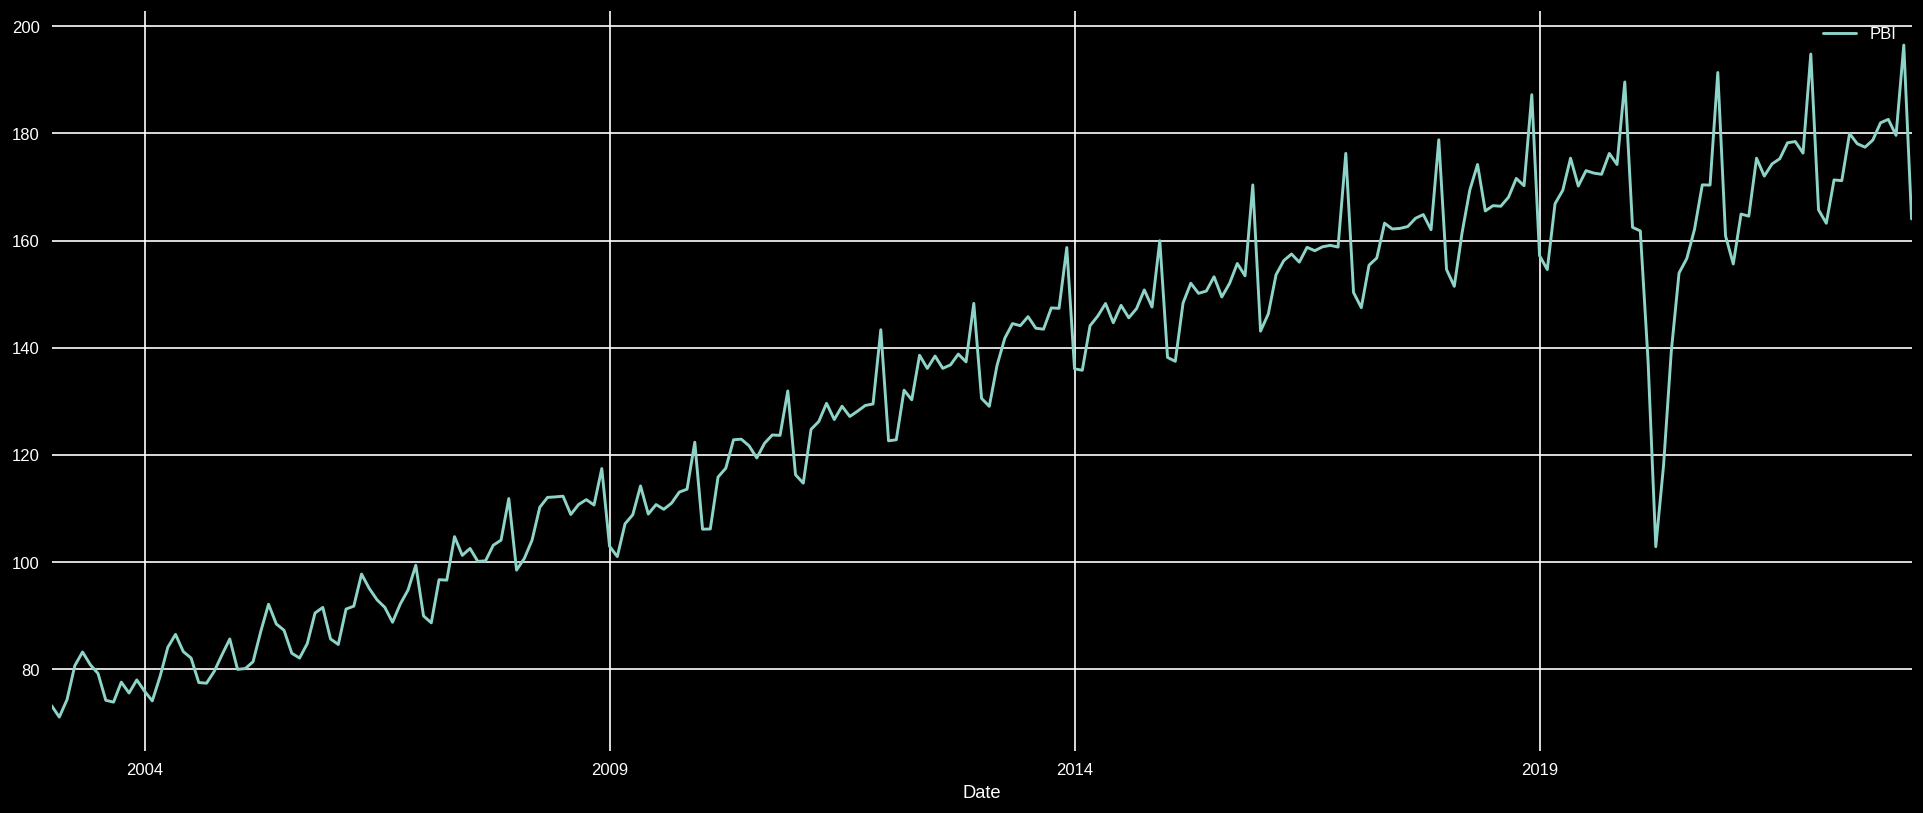

In [208]:
df.plot()
plt.show()

In [209]:
fig=px.line(df,x=df.index,y='PBI',template = "plotly_dark",
              title="PBI")
fig.show()

In [210]:
df_new=df.copy()
# Take first difference
df_new['PBI_diff'] = df['PBI'].diff()

# Remove the first data point
df_new.dropna(inplace=True)

# Take a look at the head of the dataset
df_new.head()

,PBI,PBI_diff
Date,,
2003-02-01,71.079432,-2.142937
2003-03-01,74.342723,3.263291
2003-04-01,80.667711,6.324988
2003-05-01,83.222646,2.554934
2003-06-01,80.853774,-2.368871


In [211]:
Prueba_Dickey_Fuller(df_new['PBI_diff'],'PBI_diff')

Resultados de la prueba de Dickey-Fuller para columna: PBI_diff
Test Statistic                         -5.321664
p-value                                 0.000005
No Lags Used                           15.000000
Número de observaciones utilizadas    224.000000
Critical Value (1%)                    -3.459885
Critical Value (5%)                    -2.874531
Critical Value (10%)                   -2.573694
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [212]:
fig=px.line(df_new,y='PBI_diff',template = "plotly_dark",
              title="PBI_diff")
fig.show()

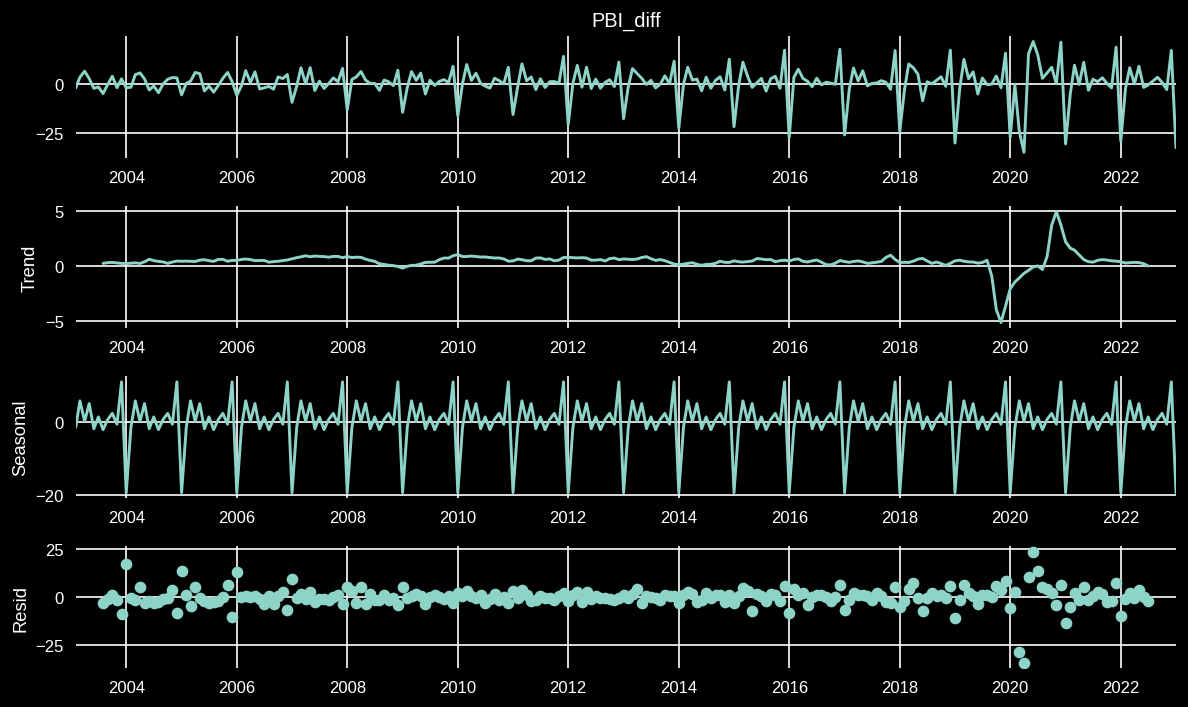

In [213]:
from statsmodels.tsa.seasonal import seasonal_decompose 
plt.rcParams["figure.figsize"]=(10,6)
a=seasonal_decompose(df_new['PBI_diff'],model='add')
a.plot()
plt.show()

In [214]:
test_size=48
train_data=df[:-test_size].dropna()
test_data=df[-test_size:].dropna()
test=test_data.copy()

In [215]:
train_data.shape

(193, 1)

In [216]:
test_data.shape

(48, 1)

# Modelo Autoarima

In [217]:
# Modelo Auto-Arima
from pmdarima import auto_arima   

In [218]:
modelo_auto=auto_arima(train_data,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=864.352, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=806.249, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=794.710, Time=0.30 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=820.459, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=794.874, Time=0.28 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=794.487, Time=0.56 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=783.575, Time=2.27 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=9.69 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=8.97 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=827.134, Time=2.91 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=785.482, Time=5.91 sec
 ARIMA(0,1,2)(1,1,2)[12]             : AIC=785.469, Time=5.86 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=797.767, Time=4.55 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=787.060, Time=10.82 sec
 ARIMA(0,1,1)(1,1,2)[12] intercept   : A

In [219]:
print(modelo_auto.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  193
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -386.788
Date:                                 Wed, 24 May 2023   AIC                            783.575
Time:                                         23:11:37   BIC                            799.540
Sample:                                     01-01-2003   HQIC                           790.048
                                          - 01-01-2019                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5532      0.051    -10.914      0.000      -0.653      -0

## **Implementacion del Modelo**

In [229]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [230]:
train_data.columns

Index(['PBI'], dtype='object')

In [231]:
arima_model = SARIMAX(train_data["PBI"], order = (0,1,1), seasonal_order = (1,1,2,12)) 
arima_result = arima_model.fit() 
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                     PBI   No. Observations:                  193
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -386.788
Date:                                 Wed, 24 May 2023   AIC                            783.575
Time:                                         23:13:10   BIC                            799.540
Sample:                                     01-01-2003   HQIC                           790.048
                                          - 01-01-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5532      0.051    -10.914      0.000      -0.653      -0.454
ar.S.L12       0.9124      0.054     16.851      0.000       0.806       1.019
ma.S.L12      -1.5491      0.096    -16.115      0.000      -1.737      -1.361
ma.S.L24       0.6825      0.078      8.708      0.000       0.529       0.836
sigma2         3.9695      0.426      9.320      0.000       3.135       4.804
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.89   Prob(JB):                         0.42
Heteroskedasticity (H):               1.29   Skew:                             0.24
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

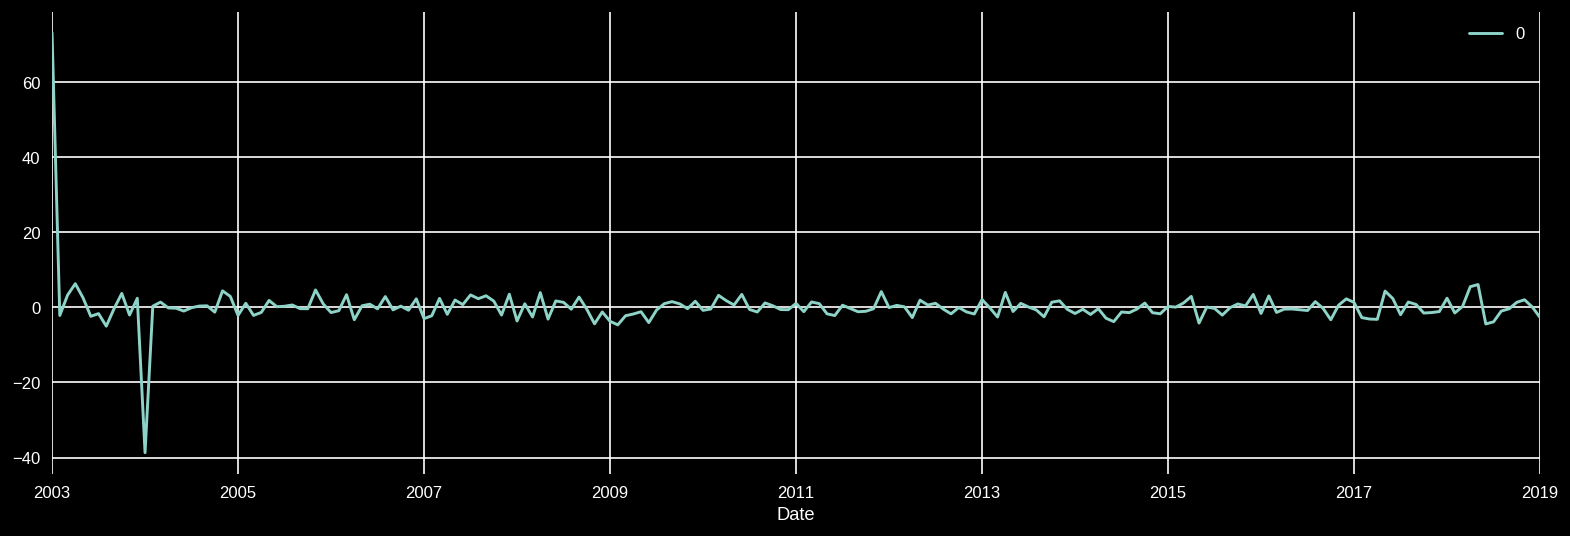

In [232]:
# Gráfico de línea de errores residuales
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

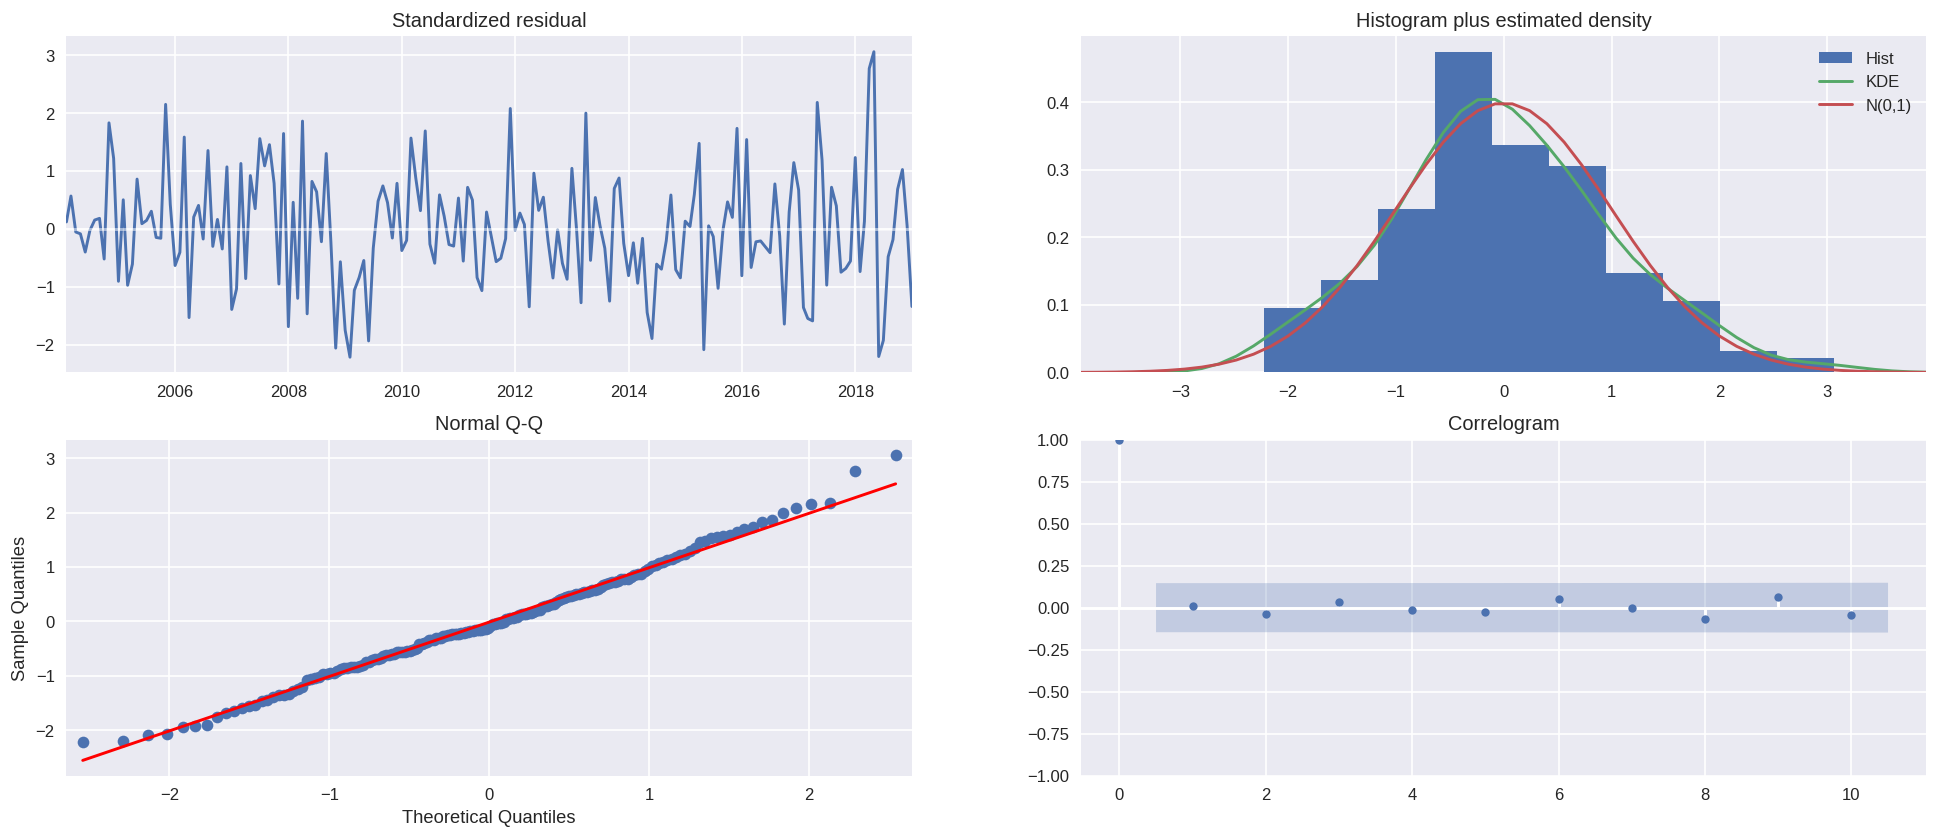

In [233]:
plt.style.use('seaborn')
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

In [234]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2019-02-01    157.293923
2019-03-01    166.380901
2019-04-01    171.113327
2019-05-01    173.772483
2019-06-01    170.185331
2019-07-01    171.937397
2019-08-01    171.322236
2019-09-01    172.902766
2019-10-01    175.217026
2019-11-01    172.830317
2019-12-01    191.353388
2020-01-01    162.314980
2020-02-01    161.154923
2020-03-01    170.167777
2020-04-01    175.592237
2020-05-01    178.391569
2020-06-01    174.147813
2020-07-01    175.639044
2020-08-01    175.350345
2020-09-01    176.937235
2020-10-01    179.240644
2020-11-01    176.795458
2020-12-01    196.022991
2021-01-01    166.036765
2021-02-01    164.729359
2021-03-01    173.674578
2021-04-01    179.730482
2021-05-01    182.657719
2021-06-01    177.814846
2021-07-01    179.068077
2021-08-01    179.077259
2021-09-01    180.669953
2021-10-01    182.963460
2021-11-01    180.464917
2021-12-01    200.335235
2022-01-01    169.484173
2022-02-01    168.042319
2022-03-01    176.925825
2022-04-01    183.557891
2022-05-01    186.601833


In [235]:
test_data.head()  #2019-02-01 y 2023-01-01

,PBI
Date,
2019-02-01,154.603349
2019-03-01,166.883514
2019-04-01,169.398010
2019-05-01,175.381659
2019-06-01,170.183485


In [244]:
arima_pred2 = arima_result.predict(start='2019-02-01',end='2023-12-01', typ="levels").rename("ARIMA Predictions")
arima_pred2

2019-02-01    157.293923
2019-03-01    166.380901
2019-04-01    171.113327
2019-05-01    173.772483
2019-06-01    170.185331
2019-07-01    171.937397
2019-08-01    171.322236
2019-09-01    172.902766
2019-10-01    175.217026
2019-11-01    172.830317
2019-12-01    191.353388
2020-01-01    162.314980
2020-02-01    161.154923
2020-03-01    170.167777
2020-04-01    175.592237
2020-05-01    178.391569
2020-06-01    174.147813
2020-07-01    175.639044
2020-08-01    175.350345
2020-09-01    176.937235
2020-10-01    179.240644
2020-11-01    176.795458
2020-12-01    196.022991
2021-01-01    166.036765
2021-02-01    164.729359
2021-03-01    173.674578
2021-04-01    179.730482
2021-05-01    182.657719
2021-06-01    177.814846
2021-07-01    179.068077
2021-08-01    179.077259
2021-09-01    180.669953
2021-10-01    182.963460
2021-11-01    180.464917
2021-12-01    200.335235
2022-01-01    169.484173
2022-02-01    168.042319
2022-03-01    176.925825
2022-04-01    183.557891
2022-05-01    186.601833


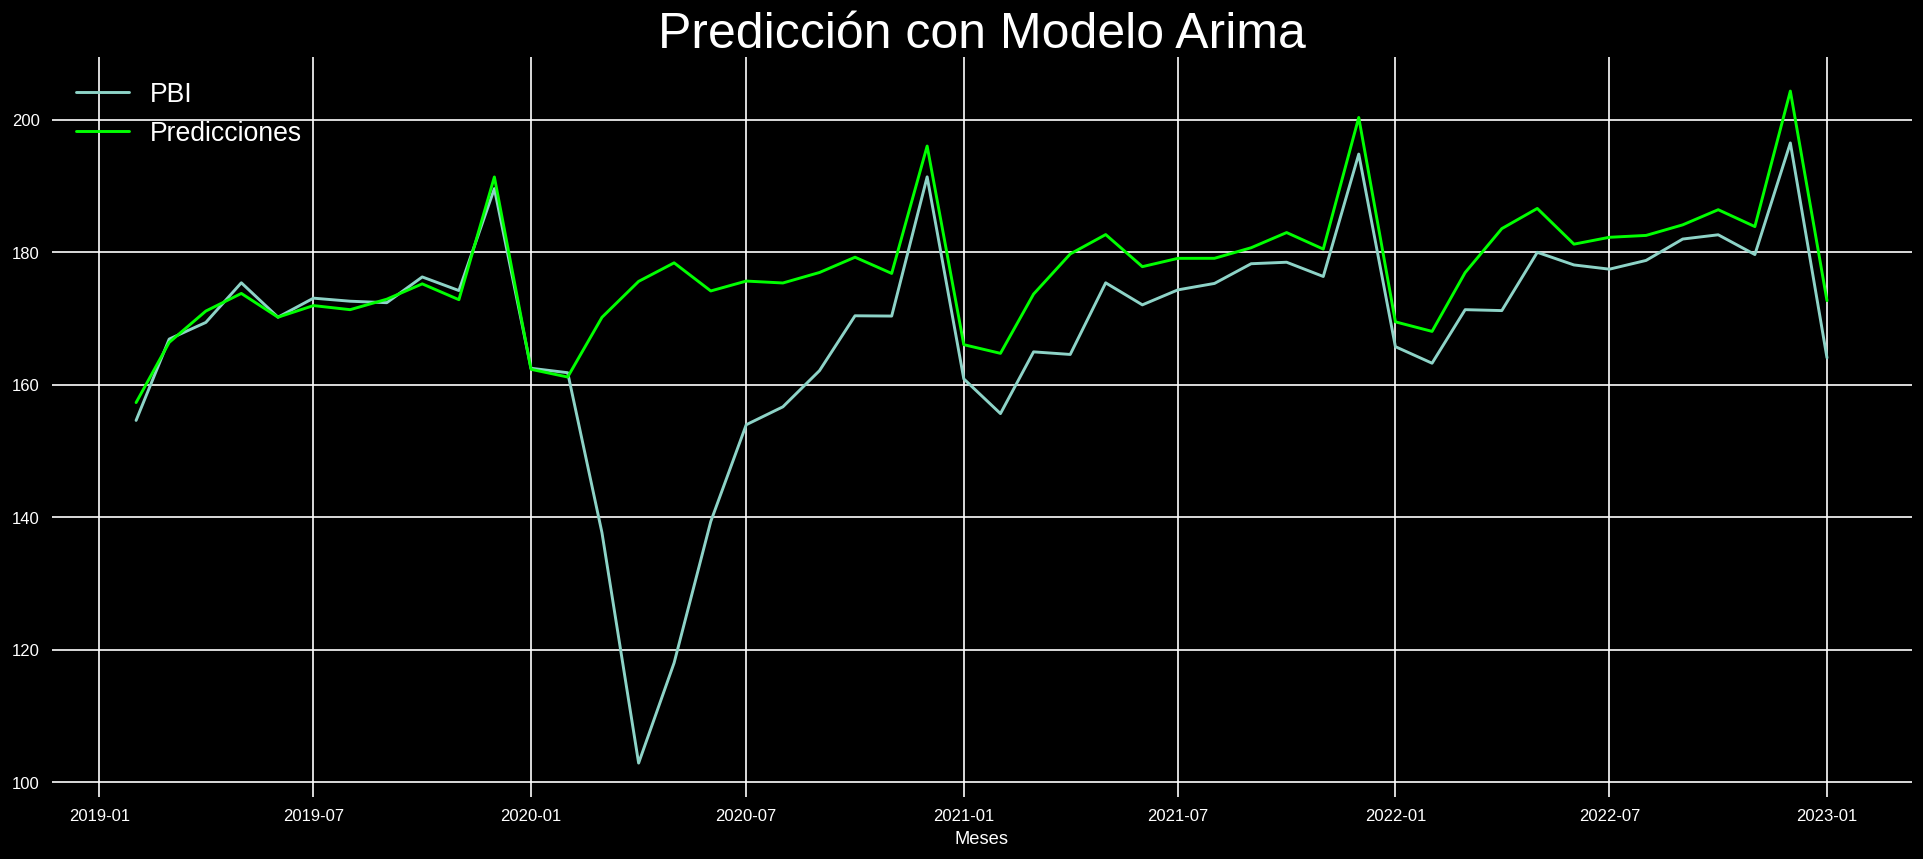

In [237]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["PBI"], label="PBI")
plt.plot(arima_pred, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

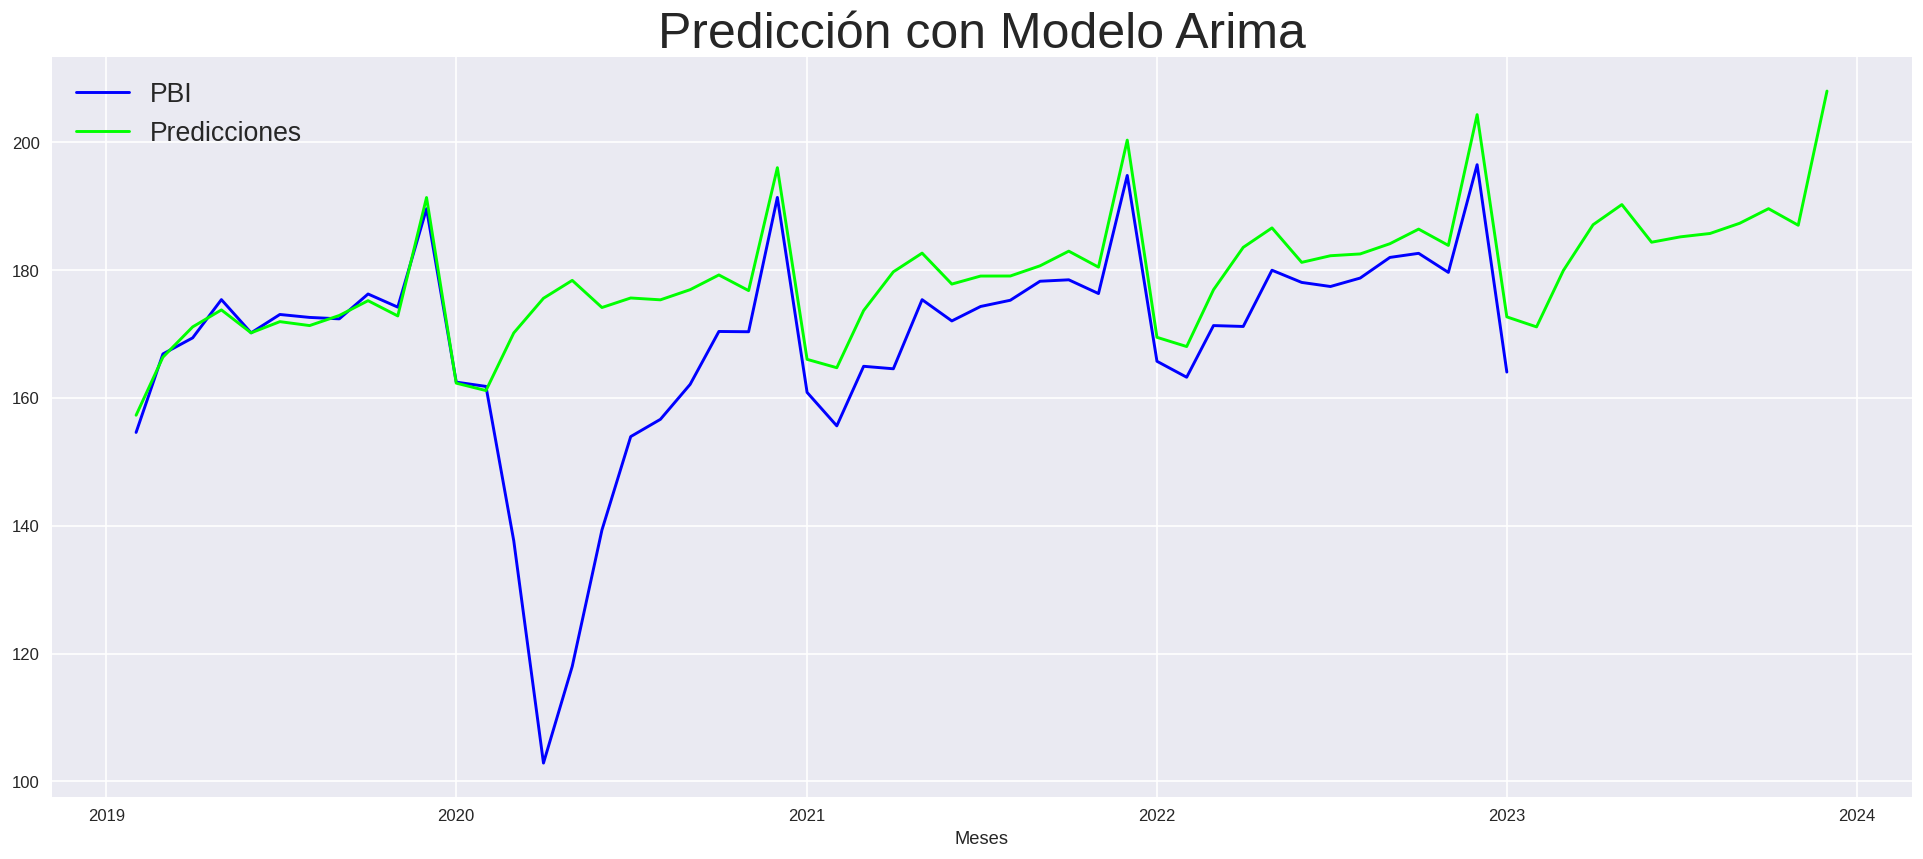

In [245]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["PBI"],color="blue" ,label="PBI")
plt.plot(arima_pred2, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();